### Import dataset from kaglehub

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /home/mohamed/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


### Load dataset as dataframe

In [63]:
import pandas as pd

books = pd.read_csv(f"{path}/books.csv")

books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [64]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

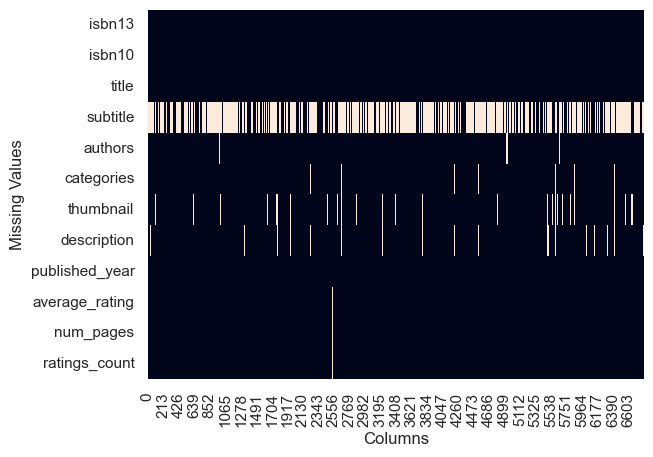

In [66]:
fig, ax = plt.subplots()

sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

### Create binary flag indicating whether each book's description is missing and Calculate how old each book

In [67]:
import numpy as np 

books['missing_description'] = np.where(books['description'].isna(), 1, 0)
books['age_of_book'] = 2025 - books['published_year']

### Calculate and visualize Spearman correlations between book features using a heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

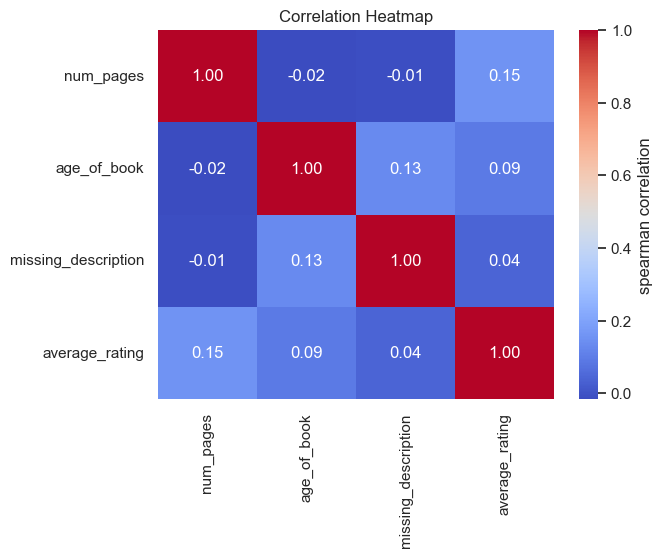

In [68]:
columns_of_interest = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

correlation_matrix = books[columns_of_interest].corr(method='spearman')

sns.set_theme(style='white')
plt.Figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'spearman correlation'})
heatmap.set_title('Correlation Heatmap')

### Filter rows where all specified columns have non-missing values

In [79]:
columns_to_check = ['description', 'num_pages', 'average_rating', 'published_year']
 
book_missing = books[books[columns_to_check].notna().all(axis=1)]

In [70]:
book_missing['categories'].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,"Adventure stories, English",1
518,Germany,1
517,Egypt,1
516,Apartments,1


### Add new column to count how many word in description in every row

In [71]:
book_missing['words_in_description'] = book_missing['description'].str.split().str.len()

/tmp/ipykernel_5469/2882849729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing['words_in_description'] = book_missing['description'].str.split().str.len()


<Axes: >

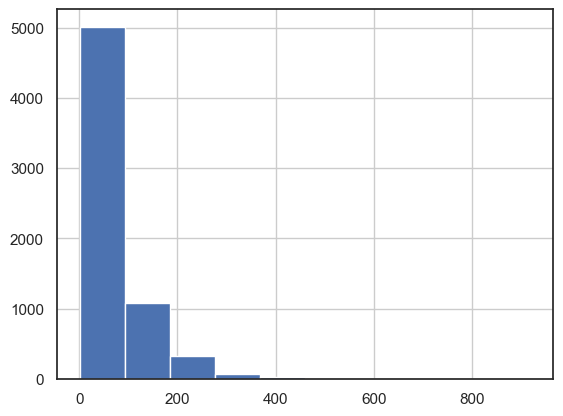

In [73]:
book_missing['words_in_description'].hist()

In [74]:
book_missing.loc[book_missing['words_in_description'].between(1, 4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [75]:
book_missing.loc[book_missing['words_in_description'].between(5, 14), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [76]:
book_missing.loc[book_missing['words_in_description'].between(15, 24), 'description']

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [77]:
book_missing.loc[book_missing['words_in_description'].between(25, 34), 'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

### Remove all description fileds has less than 25 words

In [38]:
book_missing_25_words = book_missing[book_missing['words_in_description'] >= 25]

### Combine title and subtitle in one column if subtitle field null

In [41]:
book_missing_25_words['title_and_subtitle'] = (
    np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'],
             book_missing_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis=1))
)

/tmp/ipykernel_5469/2384540949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['title_and_subtitle'] = (


### Combine isbn13 and description in one column

In [43]:
book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(': '.join, axis=1)

/tmp/ipykernel_5469/1785157903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(': '.join, axis=1)


In [47]:
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883: A NOVEL THAT READERS and critic...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736: A memorable, mesmerizing heroin..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897: Lewis' work on the nature of lo...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934: ""In The Problem of Pain, C.S. L..."


### Remove unnecessary columns and save clean dataset

In [46]:
book_missing_25_words.drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1).to_csv('data/books_cleand.csv', index=False)